In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt

In [2]:
data_path = '../data/deep-learning-with-python-data/tiny-images/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


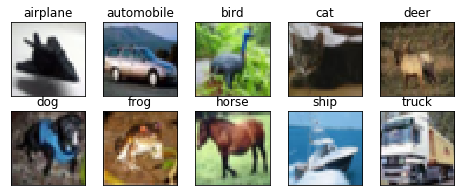

In [3]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

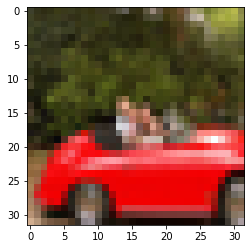

In [6]:
img, label = cifar10[99]
img, label, class_names[label]
plt.imshow(img)
plt.show()

In [7]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [8]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [9]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [10]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [11]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

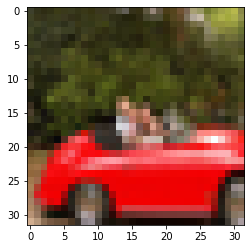

In [12]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [13]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [14]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [15]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [16]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [17]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


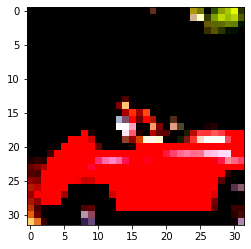

In [18]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [41]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [42]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [21]:
num_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, num_out)
)

In [22]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [23]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [24]:
softmax(x).sum()

tensor(1.)

In [25]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [26]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


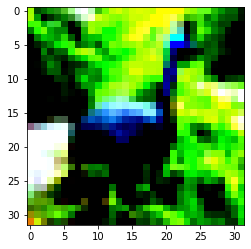

In [27]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [28]:
img_batch = img.view(-1).unsqueeze(0)

In [29]:
out = model(img_batch)
out

tensor([[0.4779, 0.5221]], grad_fn=<SoftmaxBackward>)

In [30]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [31]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [32]:
loss = nn.NLLLoss()

In [33]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.5907, grad_fn=<NllLossBackward>)

In [34]:
# model = nn.Sequential(
#     nn.Linear(3072, 512),
#     nn.Tanh(),
#     nn.Linear(512, 2),
#     nn.LogSoftmax(dim=1)
# )
# lr = 1e-2
# optimizer = optim.SGD(model.parameters(), lr=lr)
# loss_fn = nn.NLLLoss()
# epochs = 100

# for epoch in range(epochs):
#     for img, label in cifar2:
#         out = model(img.view(-1).unsqueeze(0))
#         loss = loss_fn(out, torch.tensor([label]))
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 5.743223
Epoch: 1, Loss: 5.883806
Epoch: 2, Loss: 5.885218
Epoch: 3, Loss: 6.164394


KeyboardInterrupt: 

In [35]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [37]:
model = nn.Sequential(
    nn.Linear(3072, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1)
)
lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.NLLLoss()
epochs = 100
for epoch in range(epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss %f' % (epoch, float(loss)))

Epoch: 0, Loss 0.540560
Epoch: 1, Loss 0.565049
Epoch: 2, Loss 0.329585
Epoch: 3, Loss 1.039190
Epoch: 4, Loss 0.451967
Epoch: 5, Loss 0.357199
Epoch: 6, Loss 0.513975
Epoch: 7, Loss 0.271373
Epoch: 8, Loss 0.632654
Epoch: 9, Loss 0.333513
Epoch: 10, Loss 0.270325
Epoch: 11, Loss 0.182131
Epoch: 12, Loss 0.236926
Epoch: 13, Loss 0.155081
Epoch: 14, Loss 0.311889
Epoch: 15, Loss 0.359097
Epoch: 16, Loss 0.179388
Epoch: 17, Loss 0.409628
Epoch: 18, Loss 0.254908
Epoch: 19, Loss 0.436316
Epoch: 20, Loss 0.185980
Epoch: 21, Loss 0.337550
Epoch: 22, Loss 0.218655
Epoch: 23, Loss 0.332049
Epoch: 24, Loss 0.250021
Epoch: 25, Loss 0.187292
Epoch: 26, Loss 0.133006
Epoch: 27, Loss 0.224050
Epoch: 28, Loss 0.370156
Epoch: 29, Loss 0.366413
Epoch: 30, Loss 0.166905
Epoch: 31, Loss 0.168635
Epoch: 32, Loss 0.222014
Epoch: 33, Loss 0.161907
Epoch: 34, Loss 0.217079
Epoch: 35, Loss 0.097846
Epoch: 36, Loss 0.147805
Epoch: 37, Loss 0.106719
Epoch: 38, Loss 0.097405
Epoch: 39, Loss 0.136425
Epoch: 40,

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [38]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print('Accuracy: %f' % (correct / total))

Accuracy: 0.999300


In [43]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print('Accuracy: %f' % (correct / total))

Accuracy: 0.798500


In [45]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1)
)

In [46]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)
loss_fn = nn.CrossEntropyLoss()

In [47]:
sum([p.numel() for p in model.parameters()])

3737474

In [48]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [49]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))